In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [7]:
%matplotlib inline

In [3]:
""" KH """

' KH '

In [ ]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11):
    fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/KH/Shear/Ideal/cfl04/dp_800x800x0_{n}.hdf5', 'r'))

In [4]:
""" Shocktube 1D """

' Shocktube 1D '

In [41]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/Shocktube1D/Shear/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
fss = [fs_IS, fs_ISCE]#, fs_BDNK]
names = ['IS Ideal', 'ISCE Ideal']#, 'BDNK Ideal']
names = ['IS Shear', 'ISCE Shear']#, 'BDNK Ideal']
linestyles = ['solid','dashed']#, 'dashdot']

In [42]:
for fs in fss:
    print(fs[-1].attrs['t'])
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

[0.4]
Dissipation strength 0.01, relaxation time 0.1, timestep 2.5e-05
[2.]
Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0006250000000000001


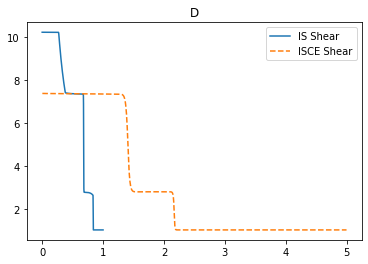

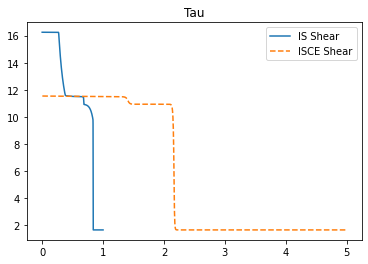

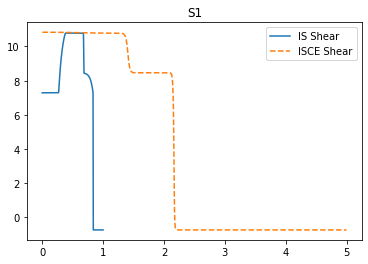

In [43]:
for quant in['D','Tau','S1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:], fs[-1]['Conserved/'+quant][:],label=name,linestyle=ls)
    plt.title(quant)
    plt.legend()
    plt.savefig("ConfirmationReportPlots/ConsIdeal_"+quant+".pdf")
    plt.show()


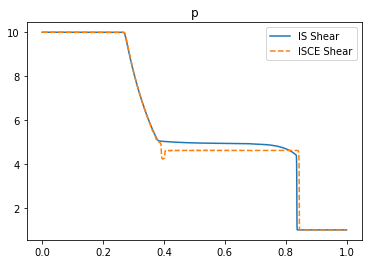

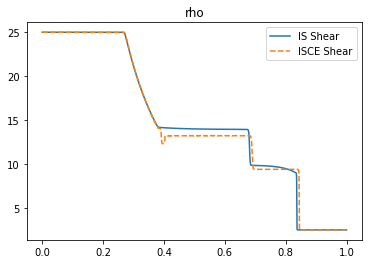

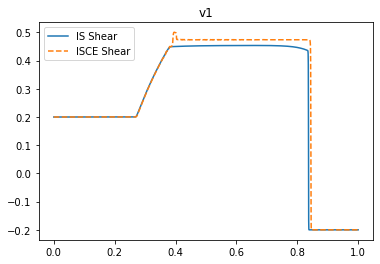

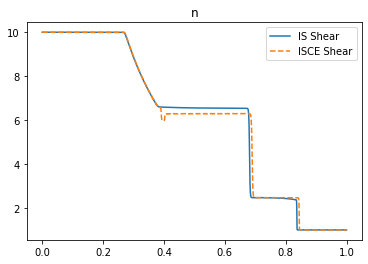

In [38]:
for quant in['p','rho','v1','n']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:], fs[-1]['Primitive/'+quant][:],label=name,linestyle=ls)
    plt.title(quant)
    plt.legend()
    plt.savefig("ConfirmationReportPlots/PrimsIdeal_"+quant+".pdf")
    plt.show()
